In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
from datetime import timedelta
from IPython.display import Markdown as md
import matplotlib.pyplot as plt

## Import the Data

Let's grab the csv I got from OSCAR

In [220]:
df = pd.read_csv("data/sleeping_on_these_hoes.csv")
df.columns = ["timestamp", "session",'event','data_duration']
df.timestamp = pd.to_datetime(df.timestamp)
df

,timestamp,session,event,data_duration
0,2024-12-02 00:57:31,1733118960,Obstructive,11.00
1,2024-12-02 00:57:57,1733118960,Obstructive,13.00
2,2024-12-01 23:56:37,1733118960,Pressure,4.00
3,2024-12-02 00:04:21,1733118960,Pressure,4.00
4,2024-12-02 00:04:21,1733118960,Pressure,4.02
...,...,...,...,...
1895990,2025-08-30 06:36:50,1756553700,Pressure,4.00
1895991,2025-08-30 06:36:00,1756553700,EPAP,4.00
1895992,2025-08-30 06:36:50,1756553700,EPAP,4.00
1895993,2025-08-30 06:35:50,1756553700,FLG,0.00


## Learning about the data

Let's start by figuring out how long each session is



In [217]:
# get the start and end time of each session and create a session dataframe
session_df = (
    df.groupby("session")
    .timestamp.agg(["min", "max"])
    .rename(columns={"min": "start_ts", "max": "end_ts"})
)
# calculating the duration
session_df['duration'] = session_df.diff(axis=1)['end_ts']
session_df

,start_ts,end_ts,duration
session,,,
1733118960,2024-12-01 23:56:27,2024-12-02 01:05:27,0 days 01:09:00
1733205960,2024-12-03 00:06:52,2024-12-03 00:42:52,0 days 00:36:00
1733208840,2024-12-03 00:54:34,2024-12-03 03:26:34,0 days 02:32:00
1733293440,2024-12-04 00:24:44,2024-12-04 03:15:44,0 days 02:51:00
1733383200,2024-12-05 01:20:35,2024-12-05 04:37:35,0 days 03:17:00
...,...,...,...
1756464120,2025-08-29 05:42:41,2025-08-29 05:43:41,0 days 00:01:00
1756466101,2025-08-29 06:15:03,2025-08-29 06:16:03,0 days 00:01:00
1756466253,2025-08-29 06:17:35,2025-08-29 06:18:35,0 days 00:01:00


### Let's visualize!

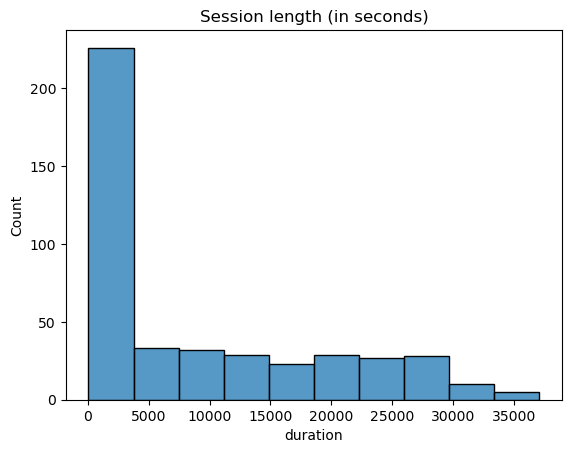

### average duration is 0 days 02:25:27.194570135

In [218]:
duration_hist = sns.histplot(session_df.duration.dt.seconds)
duration_hist.set_title("Session length (in seconds)")
plt.show()
display(md(f"### average duration is {session_df.duration.mean()}"))

OOOOOOkay....

So here's a lot of really short sessions (less than an hour and a half)
This is obviously going to require some more work. 

## To be continued in the next thrilling git commit!